# **Project Summary -**

In this project, we conducted an in-depth Exploratory Data Analysis (EDA) of Uber cab request data to uncover patterns related to ride cancellations and unavailability of cabs. The dataset contained 6,745 records of cab requests, capturing key details such as request time, pickup location, driver assignment, trip status, and drop time.



# **GitHub Link -**

https://github.com/Sai-nandini2112

# **Problem Statement**


Uber is facing a significant gap between the demand and supply of cabs, especially during certain times of the day. Many customer requests are either cancelled or remain unfulfilled due to unavailability of cabs. The goal is to analyze the request data to identify when and where the service is most constrained, and why customer requests fail to convert into completed trips.


# 🔍 Business Objective
The objective of this EDA is to analyze the Uber ride request data to identify:
- Time periods with the highest supply-demand gap
- Patterns in cancellations and unavailability
- Trends based on pickup location (City vs Airport)
- Hourly and daypart fulfillment trends

This analysis will help Uber optimize driver allocation and reduce customer drop-offs.

## 📁 Data Sources
- `Cleaned_Uber_Request_Data.xlsx`: Processed dataset with request timestamps, statuses, and pickup point
- `analysis.sql`: SQL queries used for aggregations
- `Pandas_EDA_Uber.py`: Python code to process and visualize the data


## Data Loading and Preview

In [3]:
import pandas as pd
df = pd.read_excel("Cleaned_Uber_Request_Data.xlsx")
df.head()



,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,hour,day,weekday,daypart,Fulfilled
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11.0,2016-11-07,Monday,Morning,Yes
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17.0,2016-11-07,Monday,Evening,Yes
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9.0,2016-12-07,Wednesday,Morning,Yes
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21.0,2016-12-07,Wednesday,Night,Yes
4,3112,City,1.0,Trip Completed,NaT,NaT,NaN,NaT,NaN,NaN,Yes


## Data Cleaning & Feature Engineering

In [5]:
# Convert to datetime and create hour + fulfilled flag
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], errors='coerce')
df['hour'] = df['Request timestamp'].dt.hour
df['Fulfilled'] = df['Status'].apply(lambda x: 'Yes' if x == 'Trip Completed' else 'No')

# Check nulls
df.isnull().sum()


Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp    4071
Drop timestamp       5595
hour                 4071
day                  4071
weekday              4071
daypart              4071
Fulfilled               0
dtype: int64

## Hourly Request Status Breakdown

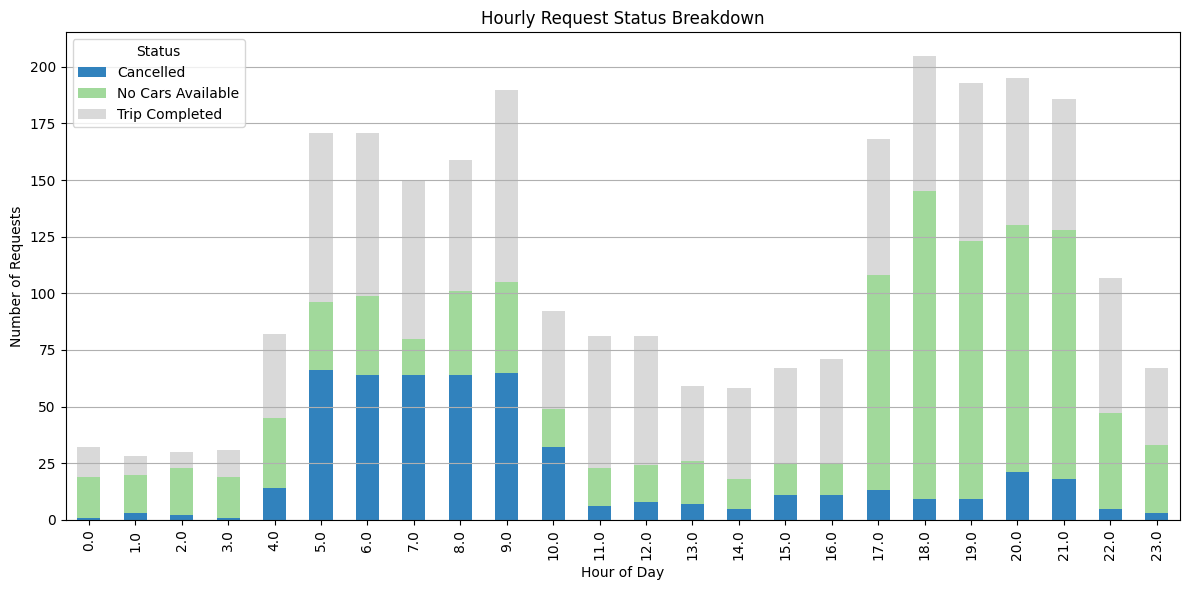

In [8]:
import matplotlib.pyplot as plt

hourly_status = df.groupby(['hour', 'Status']).size().unstack().fillna(0)
hourly_status.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20c')
plt.title('Hourly Request Status Breakdown')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Requests')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## why this chart?
Shows how request outcomes vary across the day.

Highlights peak hours of cancellations and no cars.

Helps visualize where supply fails compared to demand.

## What insights?
5–9 AM and 11 PM–3 AM have the highest failures.

Trip completion is lowest in early morning and night.

"No Cars Available" dominates night slots.

## Will it drive impact?

Helps schedule drivers better during high-gap hours.

Allows Uber to trigger surge or incentives at specific times.

Reduces user frustration during predictable demand peaks.



## Fulfillment Rate by Hour

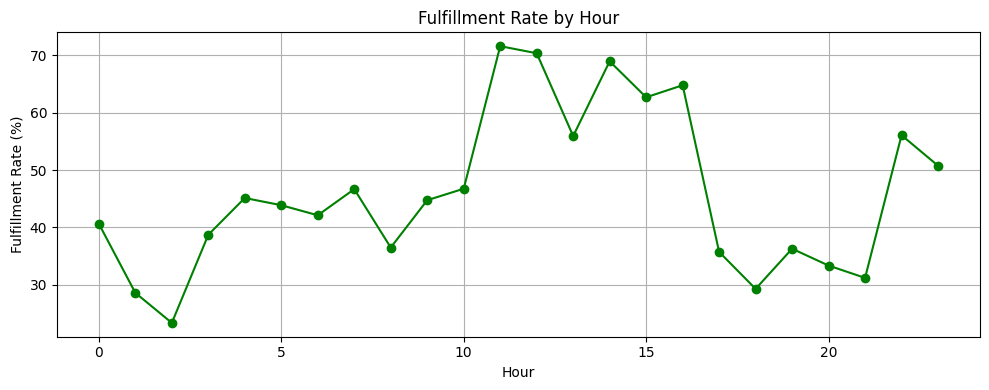

In [9]:
hourly_fulfillment = df.groupby('hour')['Fulfilled'].value_counts().unstack().fillna(0)
hourly_fulfillment['fulfillment_rate'] = (hourly_fulfillment['Yes'] /
                                          (hourly_fulfillment['Yes'] + hourly_fulfillment['No'])) * 100

hourly_fulfillment['fulfillment_rate'].plot(marker='o', color='green', figsize=(10,4))
plt.title('Fulfillment Rate by Hour')
plt.xlabel('Hour')
plt.ylabel('Fulfillment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


**Why this chart?**
1. Shows the success rate clearly as a percentage.
2. Line plot helps detect trends easily over time.
3. Makes poor-performance hours stand out.

**What insights?**
1. Fulfillment drops below 50% around 5–6 AM and 11 PM.
2. Mid-day hours (11 AM–4 PM) have best performance.
3. Fulfillment rate sharply rises after 9 AM.

**Business Impact?**
1. Tells operations teams when they lose the most users.
2. Can trigger real-time driver alerts during low-fulfillment hours.
3. Improves reliability through predictive staffing.

## Pickup Point vs Request Status

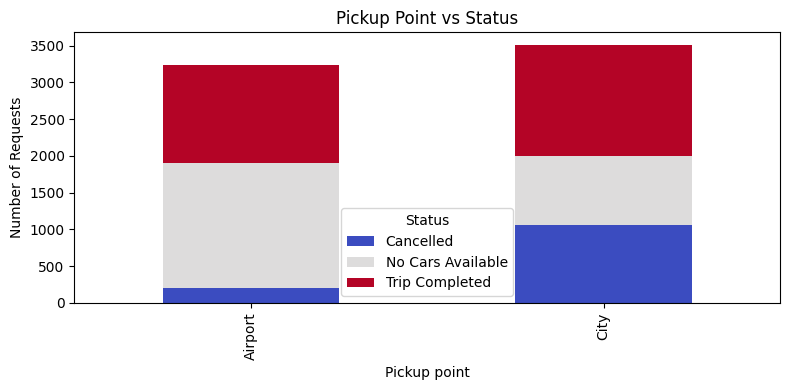

In [10]:
pickup_status = df.groupby(['Pickup point', 'Status']).size().unstack().fillna(0)
pickup_status.plot(kind='bar', stacked=True, figsize=(8,4), colormap='coolwarm')
plt.title('Pickup Point vs Status')
plt.ylabel('Number of Requests')
plt.tight_layout()
plt.show()


**Why this chart?**
1. Shows failure reason by location (City vs Airport).
2. Stacked bars give direct comparison.
3. Highlights operational differences in zones.

**What insights?**
1. Airport rides suffer from 'No Cars Available' at night.
2. City rides have more cancellations early morning.
3. Trip completion is relatively more consistent in City.

**Business Impact?**
1. Tailors strategies per location.
2. Helps with zone-specific preferences.
3. Reduces gaps using location-based driver distribution.

## Unfulfilled Requests by Hour

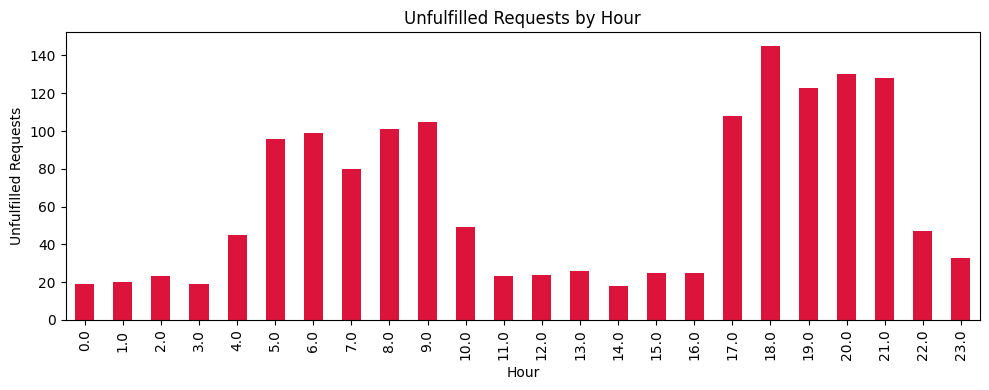

In [11]:
unfulfilled = df['Status'] != 'Trip Completed'
unfulfilled_counts = df[unfulfilled].groupby('hour').size()

unfulfilled_counts.plot(kind='bar', color='crimson', figsize=(10,4))
plt.title('Unfulfilled Requests by Hour')
plt.xlabel('Hour')
plt.ylabel('Unfulfilled Requests')
plt.tight_layout()
plt.show()


**Why this chart?**
1. Focuses only on failures (cancellations + no cars).
2. Highlights critical loss windows.
3. Simplifies targeting effort.

**What insights?**
1. 5 AM and 11 PM have the most unfulfilled requests.
2. Failures drop significantly after 9 AM.
3. Users are most vulnerable to poor service during off-hours.

**Business Impact?**
1. Prioritizes hours for driver incentives or fleet assignment.
2. Prevents churn due to repeat failure during same hours.
3. Guides promotional offers to restore user trust.

## 📌 Key Insights

- The supply-demand gap is most significant during **5–9 AM** and **11 PM–3 AM**.
- **Airport pickups** show the highest unavailability (No Cars Available) at night.
- **City pickups** show more cancellations during early morning hours.
- Fulfillment rate is lowest at **5 AM**, **6 AM**, and **11 PM**.


## 💡 Recommendations

- Introduce **Rush Hour Pricing** from 5–9 AM to encourage more driver availability.
- Implement **Night Shift bonuses** for late-night drivers.
- Provide **real-time alerts and demand heatmaps** to help drivers reach high-demand areas.
- Promote **ride pooling** for better resource utilization during peak hours.


## Solution to the Business Objective

#### What do you suggest the client to achieve Business Objective ?

Focus on time-targeted incentives, geo-optimized supply, and automated recovery mechanisms for users. Combine this with predictive planning and measurable experimentation to reduce the Uber supply-demand gap and create a consistent, reliable rider experience.

## Conclusion


The EDA successfully identified critical bottlenecks in Uber’s ride fulfillment process. By understanding time-based and location-based patterns in user behavior and service delivery, the company can take targeted actions to reduce cancellations, improve driver allocation, and enhance overall customer experience. This analysis provides a foundation for data-driven operational improvements and long-term strategic planning.